In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('HIGGS_100k.csv', header = None)


print(data.head())

print(data.info())

    0         1         2         3         4         5         6         7   \
0  1.0  0.869293 -0.635082  0.225690  0.327470 -0.689993  0.754202 -0.248573   
1  1.0  0.907542  0.329147  0.359412  1.497970 -0.313010  1.095531 -0.557525   
2  1.0  0.798835  1.470639 -1.635975  0.453773  0.425629  1.104875  1.282322   
3  0.0  1.344385 -0.876626  0.935913  1.992050  0.882454  1.786066 -1.646778   
4  1.0  1.105009  0.321356  1.522401  0.882808 -1.205349  0.681466 -1.070464   

         8         9   ...        19        20        21        22        23  \
0 -1.092064  0.000000  ... -0.010455 -0.045767  3.101961  1.353760  0.979563   
1 -1.588230  2.173076  ... -1.138930 -0.000819  0.000000  0.302220  0.833048   
2  1.381664  0.000000  ...  1.128848  0.900461  0.000000  0.909753  1.108330   
3 -0.942383  0.000000  ... -0.678379 -1.360356  0.000000  0.946652  1.028704   
4 -0.921871  0.000000  ... -0.373566  0.113041  0.000000  0.755856  1.361057   

         24        25        26       

In [55]:
label_counts = data.iloc[:, 0].value_counts()

# Exibe as contagens e a proporção
print("Contagens de Sinais e Fundos:")
print(label_counts)
print("\nProporção de Sinais e Fundos:")
print(label_counts / len(data))

Contagens de Sinais e Fundos:
0
1.0    52834
0.0    47167
Name: count, dtype: int64

Proporção de Sinais e Fundos:
0
1.0    0.528335
0.0    0.471665
Name: count, dtype: float64


<Axes: >

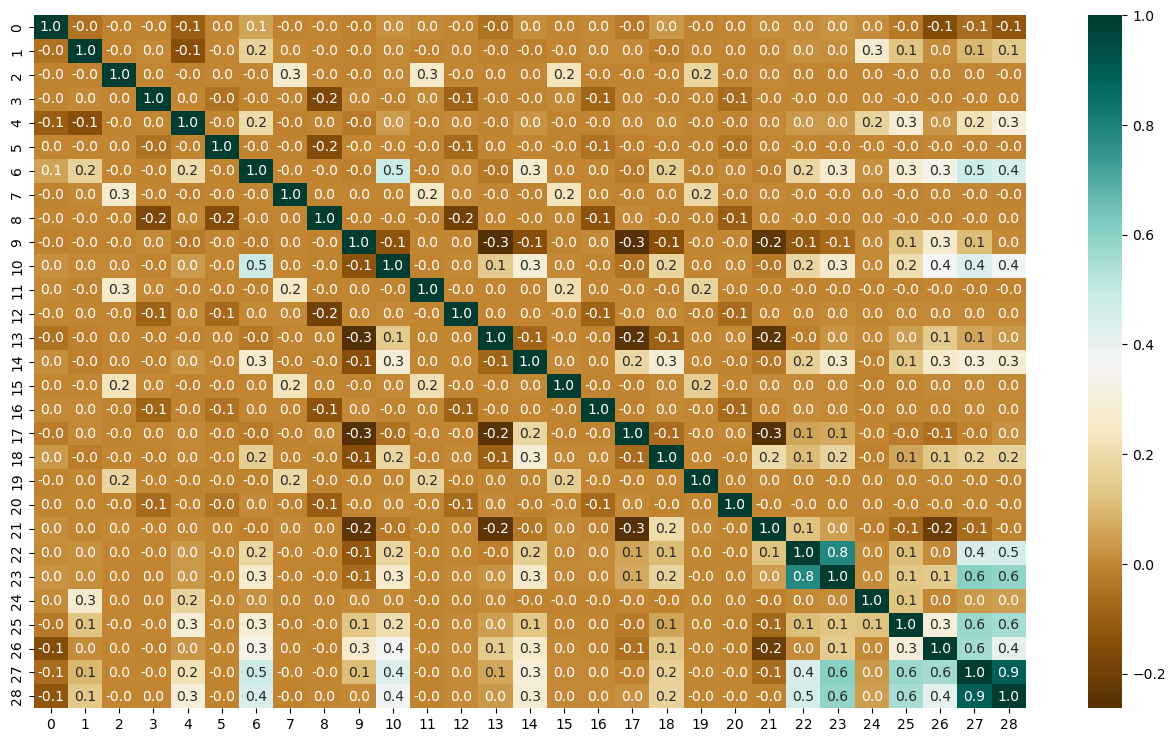

In [56]:
plt.figure(figsize=(16, 9))
sns.heatmap(data.corr(), annot=True,fmt=".1f", cmap='BrBG')

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


X = data.iloc[:, 1:22].values  # Usar apenas as 21 low feature 

y = data.iloc[:, 0].values
X_scaled = X

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [59]:
def fuc(X_train, X_val,  y_train, y_val, epoch = 10, batch = 100):
    active = ['relu', 'sigmoid', 'tanh', 'relu6', 'elu', 'softmax'] 
    dense = [256, 128, 64, 32, 1]
    camadas = [None]*len(dense)
    for l in range(0, 1):
        for k in range(0, len(dense)):
            model = Sequential()
            atual = 0
            for i, element in enumerate(active):
                for j in range(0, len(dense)):
                    if j == k:
                        model.add(Dense(dense[j] ,activation=element))
                    elif camadas[j] != None:
                        model.add(Dense(dense[j] ,activation=camadas[j]))
                    else:
                        model.add(Dense(dense[j] ,activation='relu'))
                
                optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
                model.compile(optimizer= optimizer, loss = "MSE" , metrics=['accuracy'])

                # Treinar o modelo
                treino = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, batch_size = batch)

                if np.max(treino.history['val_accuracy']) > atual: 
                    camadas[k] = element
                    atual = np.max(treino.history['val_accuracy'])

    return print(camadas)

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


# Estrutura da rede neural
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [63]:
from tensorflow.keras.metrics import Precision, Recall, AUC
optimizer = Adam()
model.compile(optimizer= optimizer, loss = 'binary_crossentropy' ,  metrics=['accuracy', Precision(), Recall(), AUC()])

# Treina o modelo
treino = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, batch_size = 50, validation_split=0.2)


Epoch 1/300
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5201 - auc: 0.5139 - loss: 0.6998 - precision: 0.5356 - recall: 0.6771 - val_accuracy: 0.5420 - val_auc: 0.5800 - val_loss: 0.6869 - val_precision: 0.5365 - val_recall: 0.9804
Epoch 2/300
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - accuracy: 0.5436 - auc: 0.5524 - loss: 0.6868 - precision: 0.5452 - recall: 0.7628 - val_accuracy: 0.5624 - val_auc: 0.6144 - val_loss: 0.6778 - val_precision: 0.5507 - val_recall: 0.9344
Epoch 3/300
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.5651 - auc: 0.5905 - loss: 0.6780 - precision: 0.5663 - recall: 0.7602 - val_accuracy: 0.5826 - val_auc: 0.6261 - val_loss: 0.6715 - val_precision: 0.5699 - val_recall: 0.8568
Epoch 4/300
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.5815 - auc: 0.6101 - loss: 0.6722 - precision: 0.5841 - recall: 0.7294 - val_accuracy: 0.5941 - val_auc: 0.6391 - val_loss: 0.6651 - val_precision: 0.5819 - val_recall: 0.8245
Epoch 5/300
16

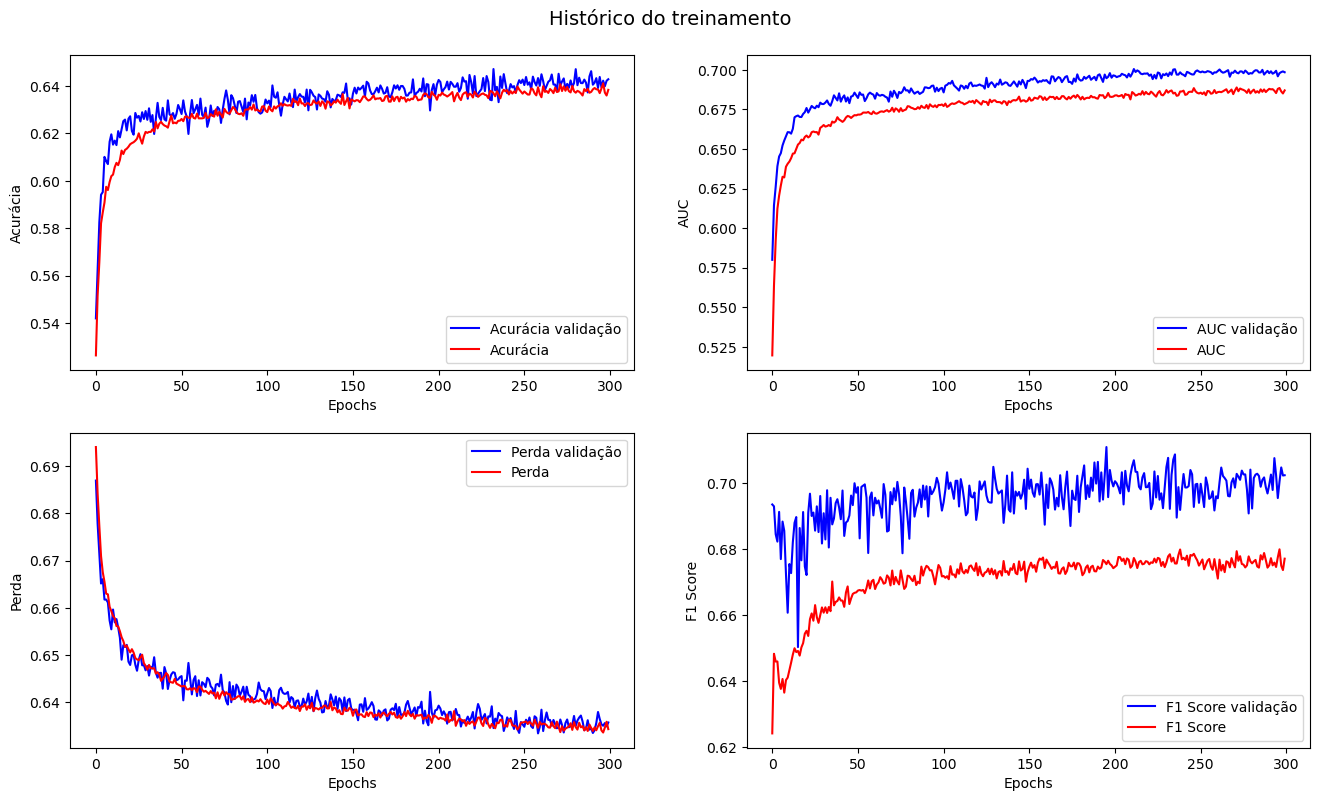

In [101]:
f1 = 2 *  np.array(treino.history['precision'])*np.array(treino.history['recall'])/np.array((treino.history['precision']) + np.array(treino.history['recall']))
val_f1 = 2 *  np.array(treino.history['val_precision'])*np.array(treino.history['val_recall'])/np.array((treino.history['val_precision']) + np.array(treino.history['val_recall']))
metodos = ['Acurácia', 'AUC', "Perda"]
metodos_name = ['Acurácia', 'AUC', "Perda"]
stat = ['accuracy', 'auc', 'loss']


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 9))
c1 = 'b'
c2 = 'r'
ax = [ax1, ax2, ax3]
for i, element in enumerate(metodos):
    ax[i].plot(treino.history[str('val_' + stat[i])], color=c1, label=str(element + ' validação'))
    ax[i].plot(treino.history[stat[i]], color=c2, label= element)
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metodos_name[i])
    ax[i].legend()

ax4.plot(val_f1, color=c1, label=str('F1 Score' + ' validação'))
ax4.plot(f1, color=c2, label= 'F1 Score')
ax4.set_xlabel("Epochs")
ax4.set_ylabel('F1 Score')
ax4.legend()
    
fig.suptitle("Histórico do treinamento", y = 0.93, fontsize = 14)
plt.show()

In [102]:
y_pred = model.predict(X)
y_pred = (y_pred >= 0.5).astype(int).flatten() # sinal

counts = np.bincount(y_pred)
print('pred:',  counts)
counts = np.bincount(y.astype(int))
print('real:',  counts)


3126/3126 ━━━━━━━━━━━━━━━━━━━━ 2s 519us/step
pred: [33402 66599]
real: [47167 52834]


[0.87667835 0.79834259 0.78011757 ... 0.96314991 1.466187   1.20593917]


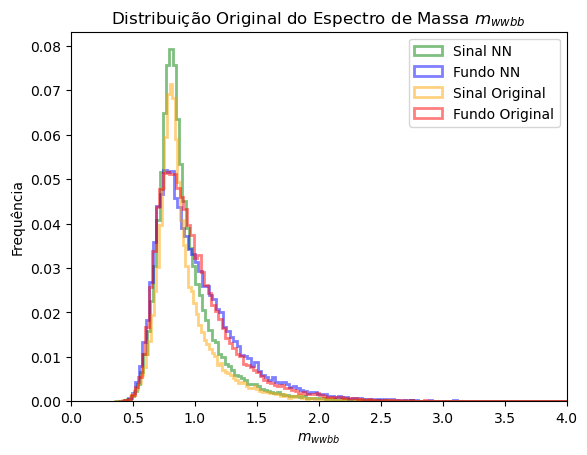

In [152]:
# Selecionar a coluna m_wwbb 
m_wwbb = data.iloc[:, -1].values

print(m_wwbb)

# Separar os eventos previstos como sinal e fundo
m_wwbb_signal = m_wwbb[y_pred.flatten() == 1]
m_wwbb_background = m_wwbb[y_pred.flatten() == 0]
b = 200
cl = ['green', 'blue', 'orange', 'red']

# Pesos
weights_signal = np.ones_like(m_wwbb_signal) / len(m_wwbb_signal)
weights_background = np.ones_like(m_wwbb_background) / len(m_wwbb_background)

# Histograma para o espectro de massa m_wwbb
plt.hist(m_wwbb_signal, bins=b, alpha=0.5, color = cl[0] , label='Sinal NN',  weights= weights_signal, histtype='step', linewidth=2)
plt.hist(m_wwbb_background, bins=b, alpha=0.5, color = cl[1], label='Fundo NN',  weights=weights_background, histtype='step', linewidth=2)


# Histograma para os valores originalmente rotulados
m_wwbb_signal_original = m_wwbb[y == 1]
m_wwbb_background_original = m_wwbb[y == 0]

weights_signal_original = np.ones_like(m_wwbb_signal_original) / len(m_wwbb_signal_original)
weights_background_original = np.ones_like(m_wwbb_background_original) / len(m_wwbb_background_original)

plt.hist(m_wwbb_signal_original, bins=b, alpha=0.5,color = cl[2], label='Sinal Original', weights= weights_signal_original, histtype='step', linewidth=2)
plt.hist(m_wwbb_background_original, bins=b, alpha=0.5,color = cl[3],  label='Fundo Original', weights= weights_background_original, histtype='step', linewidth=2)
plt.xlabel(r'$m_{wwbb}$')
plt.ylabel('Frequência')
plt.legend(loc='upper right')
plt.title(r'Distribuição Original do Espectro de Massa $m_{wwbb}$')
plt.xlim(0,4)
plt.show()